To ease the generation of pictures, the idea is to take a video and split it into frames. Since some (or most) frames of a video might be blurred and thus not useable, we remove frames that are too blurry. The process of generating a value, that captures blurriness (or sharpness) comes from: https://www.pyimagesearch.com/2015/09/07/blur-detection-with-opencv/.

### Import libraries

In [1]:
import cv2 # OpenCV
from pathlib import Path
import matplotlib.pyplot as plt # To show images

In [2]:
%matplotlib inline

### Create output and input paths

In [3]:
vid_path = Path('data/vid/sample')
pic_path = Path('data/pic/sample')

In [18]:
#vid_filename = 'LED_correct_black_1.mp4'
vid_filename = 'LED_correct_wood_1.mp4'
vid_filepath  = vid_path / vid_filename

### Take a look at the blurriness detection

The following function takes an cv2 image and returns the degree of blurriness (the lower, the blurrier) and also if the blurr value is above a certain treshold. (See  https://www.pyimagesearch.com/2015/09/07/blur-detection-with-opencv/) for further information.

In [5]:
def get_blurr(im, threshold = 175):
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) # transform image to grayscale, since coloration is not of interest
    blurr = cv2.Laplacian(gray, cv2.CV_64F).var() # the degree of blurrines (or rather sharpness)
    
    test = blurr > threshold
    
    return blurr, test

To see the effect, we plot the most and the least blurry frame of the sample video.

In [12]:
cam = cv2.VideoCapture(str(vid_filepath))
min_blurr = 99
max_blurr = 0

while(True):
    ret, frame = cam.read() # read current frame, ret is False if frame is empty
    if ret:    
        blurr, _ = get_blurr(frame) # the blurriness of the current frame
        
        if blurr < min_blurr:
            min_blurr = blurr
            min_frame = frame
            
        if blurr > max_blurr:
            max_blurr = blurr
            max_frame = frame
        
    else:
        break

data/vid/sample/LED_correct_black_1.mp4
166.1084388956034
200.01764891824584
260.1794196590581
296.0251580708394
243.9627415619104
153.21414399978903
131.37597316551725
160.38910631078932
172.23925877532588
68.36555748143844
59.57666907317627
99.0553240511438
80.07895109365748
85.41234849429497
89.92884210149614
60.65423513873111
70.82759739915906
87.4887842393642
59.967815385983315
53.111073966264605
74.5469545376441
84.262787884578
124.12834244053006
116.2898692325208
91.3185498225652
93.65108454518374
102.55874083608403
129.2278968022766
59.392951680662925
66.87524727892581
98.79364525432612
70.7878176551032
66.88281616184051
68.36748439067856
71.23416667496842
67.0157521639014
85.80034018619338
160.84512246444186
109.61706741753004
45.33735869933193
60.60980815910802
49.70532394115309
59.05130063429468
91.58751535332244
167.21228028165277
198.79267499570756
274.7054954658143
304.30135849209637
339.24341213422355
307.59321338694355
185.0023586650143
355.81414138225637
374.1937335768

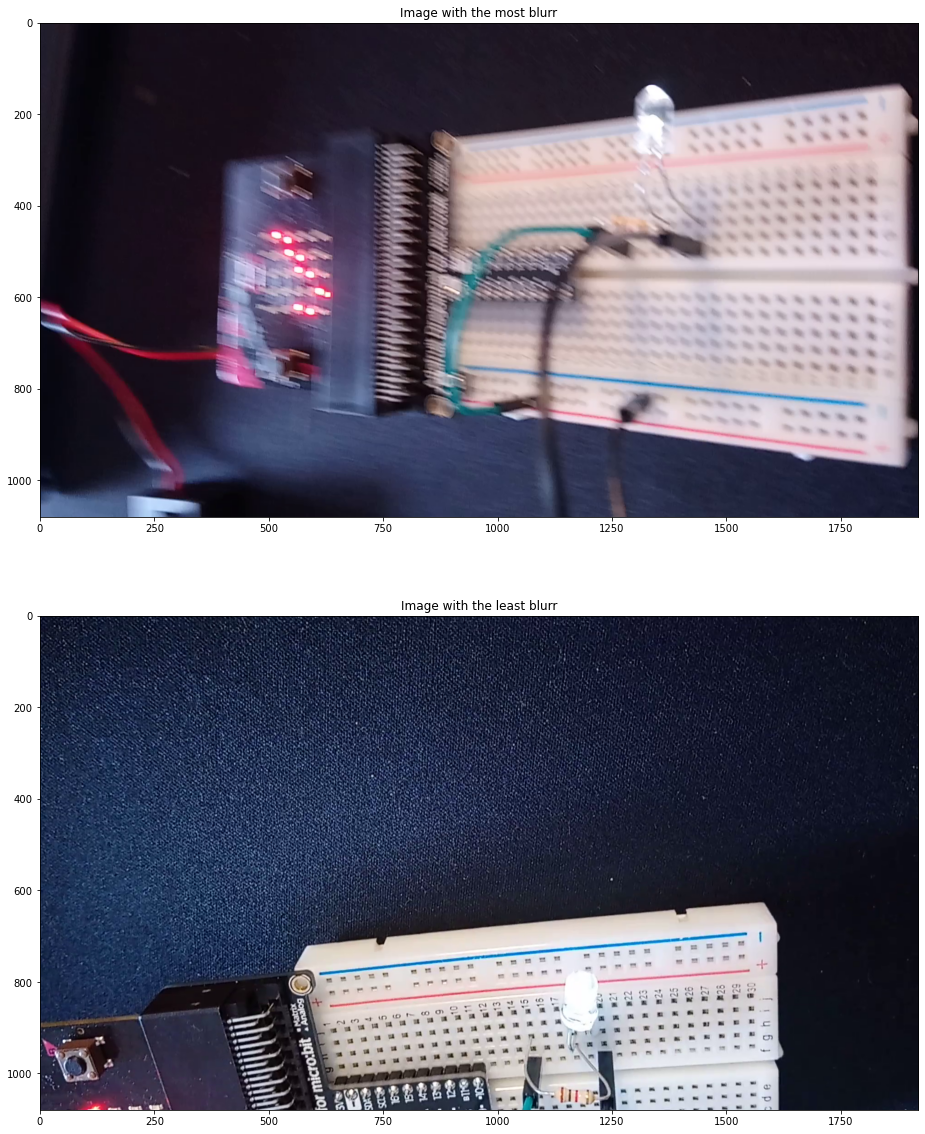

In [13]:
min_frame = cv2.cvtColor(min_frame, cv2.COLOR_BGR2RGB) # Transform, to display with plt.imshow()
max_frame = cv2.cvtColor(max_frame, cv2.COLOR_BGR2RGB)

# display the captured frames
plt.figure(figsize = (50,20))
plt.subplot(211)
plt.title('Image with the most blurr')
plt.imshow(min_frame)
plt.subplot(212)
plt.title('Image with the least blurr')
plt.imshow(max_frame)
plt.show()

The second, least blurry picture shows, that we still have to make shure, that the picture __actually contains the things__ that are of interest to us, regardless of the quality of the picture.

This has to be taken into account, when recording the video, or remmove all those instances by hand.

### Generate .jpg from frames with low blurriness

The generated pictures are saved in a separate folder and shall mimic the folder structure of the vid folder.

In [50]:
def get_frames(vid_filepath, threshold = 175):
    cam = cv2.VideoCapture(str(vid_filepath))
    currentframe = 0 # index the current frames from cam.read()
    lastframe = -99 # to prevent resampling similar frames

    while(True):
        ret, frame = cam.read() # read current frame, ret is False if frame is empty
        if ret:
            frame_filename = str(vid_filename)[:-4] + '_frame_' + str(currentframe) + '.jpg'
            frame_filepath = pic_path / frame_filename

            blurr, test = get_blurr(frame, threshold) # the blurriness of the current frame
            #print(blurr)

            if test and (currentframe - lastframe > 15):
                print('Creating image:', frame_filepath)
                cv2.imwrite(str(frame_filepath), frame) # write to .jpg
                lastframe = currentframe

            currentframe += 1 # increase for next frame
        else:
            break

In [52]:
get_frames(vid_filepath, 60)

Creating image: data/pic/sample/LED_correct_wood_1_frame_87.jpg
Creating image: data/pic/sample/LED_correct_wood_1_frame_112.jpg
Creating image: data/pic/sample/LED_correct_wood_1_frame_128.jpg


In [41]:
!ls {pic_path} -1 | wc -l

15


__The method used here does not seem to be suited.__ Apparently its hard to achieve both sharpness and varying angles. At least, it should be __much easier to take good quality photos from different angles manually__. Besides that, at least the blurriness function can be salvaged.